In [97]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os 

# Lets move dir to where the data is stored

In [98]:
path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Epanet_python/validation_data" # mac
# path = r"C:\Users\frodi\Documents\OptimisedHeating\Epanet_python\validation_data" # windows

os.chdir(path)

print(os.listdir())

['rs_sim_flow.csv', 'RS_flow_sim.csv', 'VE_nedri_actual_power.csv', 'flow_values_VE_nedri.csv', 'VE_efri_actual_energy.csv', 'RS_energy_sim.csv', 'rjupnasalir_two_pumps_actual.csv', 'VE_pumps_sim.csv', 'flow_values_VE_efri.csv', 'VE_nedri_flow_sim.csv', 'rs_actual_flow.csv', 'rs_sim_energy.csv', 'flow_VE_efri_sim.csv', 'VE_nedri_pumps_energy_sim.csv']


# Lets load data

In [99]:
VE_nedri_flow = pd.read_csv("flow_values_VE_nedri.csv")
# Convert start_time to datetime
VE_nedri_flow["start_time"] = pd.to_datetime(VE_nedri_flow["start_time"])
day = VE_nedri_flow["start_time"].dt.date
VE_nedri_flow = VE_nedri_flow.copy()
VE_nedri_flow = VE_nedri_flow.drop(columns=["start_time"])
VE_nedri_flow = VE_nedri_flow.rename(columns={"value" : "VE_nedri_actual_flow"})


VE_nedri_flow = VE_nedri_flow[:22]
print(VE_nedri_flow)

    VE_nedri_actual_flow
0                  13.29
1                  13.30
2                  13.43
3                  14.07
4                  14.67
5                  15.52
6                  16.50
7                  16.05
8                  15.68
9                  15.49
10                 15.56
11                 16.00
12                 16.02
13                 15.25
14                 15.42
15                 15.08
16                 15.79
17                 16.72
18                 16.07
19                 16.09
20                 16.22
21                 16.40


In [100]:
day = day[0]
day

datetime.date(2024, 8, 8)

In [101]:
VE_nedri_power = pd.read_csv("VE_nedri_actual_power.csv")
VE_nedri_power = VE_nedri_power.drop(columns=["start_time","mpoint_id"])
VE_nedri_power = VE_nedri_power.rename(columns={"value" : "VE_nedri_actual_power"})

VE_nedri_power = VE_nedri_power[:22]
print(VE_nedri_power)


    VE_nedri_actual_power
0                1.023380
1                0.916956
2                0.934039
3                1.000263
4                1.135048
5                1.321646
6                1.613371
7                2.251519
8                2.137081
9                2.084879
10               2.083356
11               2.117623
12               2.112118
13               1.956874
14               1.991550
15               1.940162
16               2.156364
17               2.299516
18               2.461400
19               2.661171
20               2.720982
21               2.815616


In [102]:
VE_nedri_flow_sim = pd.read_csv("VE_nedri_flow_sim.csv")
VE_nedri_flow_sim = VE_nedri_flow_sim.drop(columns = ["Time (hrs)"])
VE_nedri_flow_sim = VE_nedri_flow_sim.rename(columns={"Flow 19 (LPS)" : "VE_nedri_simulated_flow"})

VE_nedri_flow_sim = VE_nedri_flow_sim[:22]
print(VE_nedri_flow_sim)

    VE_nedri_simulated_flow
0                 21.701357
1                 21.900299
2                 22.099241
3                 22.646338
4                 22.911600
5                 23.641047
6                 24.403677
7                 25.580761
8                 24.735239
9                 24.619188
10                25.448116
11                25.365225
12                24.901020
13                24.934181
14                25.083393
15                26.028374
16                26.592037
17                24.867884
18                25.995213
19                26.625198
20                26.078102
21                25.564167


In [103]:
VE_nedri_power_sim = pd.read_csv("VE_nedri_pumps_energy_sim.csv")
VE_nedri_power_sim = VE_nedri_power_sim.drop(columns = ["Time (hrs)"])
VE_nedri_power_sim = VE_nedri_power_sim.rename(columns={"Vatnsendi neðra (kW)": "VE_nedri_simulated_power"})
VE_nedri_power_sim = VE_nedri_power_sim[:22]
print(VE_nedri_power_sim)


    VE_nedri_simulated_power
0                   9.497390
1                   9.570535
2                   9.643299
3                   9.841412
4                   9.936399
5                  10.193926
6                  10.457253
7                  10.851367
8                  10.569801
9                  10.530542
10                 10.807720
11                 10.780345
12                 10.625628
13                 10.636760
14                 10.686696
15                 10.997188
16                 11.177548
17                 10.614494
18                 10.986463
19                 11.188045
20                 11.013247
21                 10.845918


In [104]:
VE_nedri_df = pd.concat([VE_nedri_flow,VE_nedri_power,VE_nedri_flow_sim,VE_nedri_power_sim], axis=1)
VE_nedri_df.head()

,VE_nedri_actual_flow,VE_nedri_actual_power,VE_nedri_simulated_flow,VE_nedri_simulated_power
0,13.29,1.023380,21.701357,9.497390
1,13.30,0.916956,21.900299,9.570535
2,13.43,0.934039,22.099241,9.643299
3,14.07,1.000263,22.646338,9.841412
4,14.67,1.135048,22.911600,9.936399


In [105]:
VE_nedri_df["VE_nedri_simulated_flow"] = VE_nedri_df["VE_nedri_simulated_flow"] * 0.61
VE_nedri_df["VE_nedri_simulated_power"] = VE_nedri_df["VE_nedri_simulated_power"] * (1/8)


print(VE_nedri_df)

    VE_nedri_actual_flow  VE_nedri_actual_power  VE_nedri_simulated_flow  \
0                  13.29               1.023380                13.237828   
1                  13.30               0.916956                13.359182   
2                  13.43               0.934039                13.480537   
3                  14.07               1.000263                13.814266   
4                  14.67               1.135048                13.976076   
5                  15.52               1.321646                14.421038   
6                  16.50               1.613371                14.886243   
7                  16.05               2.251519                15.604264   
8                  15.68               2.137081                15.088496   
9                  15.49               2.084879                15.017705   
10                 15.56               2.083356                15.523351   
11                 16.00               2.117623                15.472787   
12          

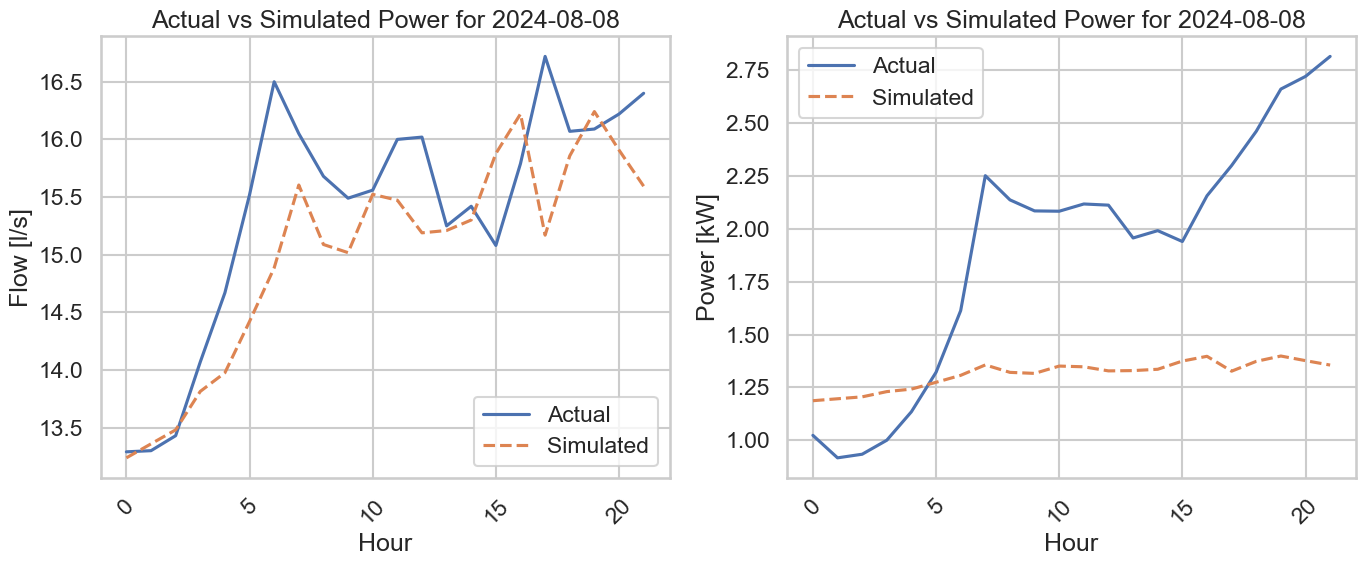

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for clean plots
sns.set(style="whitegrid", context="talk")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Actual vs Simulated Flow
sns.lineplot(ax=axes[0], x=VE_nedri_df.index, y="VE_nedri_actual_flow", data=VE_nedri_df, label="Actual")
sns.lineplot(ax=axes[0], x=VE_nedri_df.index, y="VE_nedri_simulated_flow", data=VE_nedri_df, label="Simulated", linestyle='--')
axes[0].set_title(f"Actual vs Simulated Power for {day}")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Flow [l/s]")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Actual vs Simulated Power
sns.lineplot(ax=axes[1], x=VE_nedri_df.index, y="VE_nedri_actual_power", data=VE_nedri_df, label="Actual")
sns.lineplot(ax=axes[1], x=VE_nedri_df.index, y="VE_nedri_simulated_power",data=VE_nedri_df, label="Simulated", linestyle='--')
axes[1].set_title(f"Actual vs Simulated Power for {day}")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Power [kW]")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from scipy.stats import pearsonr

# For Flow
actual_flow = VE_nedri_df["VE_nedri_actual_flow"]
sim_flow = VE_nedri_df["VE_nedri_simulated_flow"]

mae_flow = mean_absolute_error(actual_flow, sim_flow)
rmse_flow = np.sqrt(mean_squared_error(actual_flow, sim_flow))
r_flow, p_flow = pearsonr(actual_flow, sim_flow)

print(f"Flow MAE: {mae_flow:.3f}")
print(f"Flow RMSE: {rmse_flow:.3f}")
print(f"Flow Pearson r: {r_flow:.3f} (p = {p_flow:.3g})")

# For Power
actual_power = VE_nedri_df["VE_nedri_actual_power"]
sim_power = VE_nedri_df["VE_nedri_simulated_power"]

mae_power = mean_absolute_error(actual_power, sim_power)
rmse_power = np.sqrt(mean_squared_error(actual_power, sim_power))
r_power, p_power = pearsonr(actual_power, sim_power)

print(f"Power MAE: {mae_power:.3f}")
print(f"Power RMSE: {rmse_power:.3f}")
print(f"Power Pearson r: {r_power:.3f} (p = {p_power:.3g})")

Flow MAE: 0.507
Flow RMSE: 0.680
Flow Pearson r: 0.826 (p = 2.16e-06)
Power MAE: 0.678
Power RMSE: 0.784
Power Pearson r: 0.914 (p = 2.75e-09)


🔹 Flow
MAE (Mean Absolute Error): 0.507
On average, your simulated flow is 0.507 L/s off from the actual flow.
This is a direct measure of error in the same units as the data (L/s).
RMSE (Root Mean Squared Error): 0.680
Similar to MAE, but it penalizes larger errors more.
Your RMSE of 0.680 means larger deviations (outliers) exist but are not severe.
Pearson r: 0.826 (p = 2.16e-06)
A correlation of 0.826 shows a strong positive linear relationship between actual and simulated flow.
The p-value is very small (≈0), indicating the correlation is statistically significant (not due to random chance).


🔹 Power
MAE: 0.678 kW
On average, your simulated power is 0.678 kW off from the real measurement.
RMSE: 0.784 kW
Again, slightly higher than MAE, showing some larger errors are present but controlled.
Pearson r: 0.914 (p = 2.75e-09)
A correlation of 0.914 is very strong, indicating the simulated power tracks actual power closely.
The tiny p-value confirms this correlation is statistically significant.